In [6]:
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [7]:
# Ruta a los archivos (desde ETL)
folder_path = "../DataLake"
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

# Guardar columnas por dataset
columnas_por_dataset = {}
columnas_totales = set()

# Paso 1: recolectar columnas
for file in csv_files:
    dataset_name = file.replace(".csv", "")
    path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(path, nrows=1)  # Solo una fila para cargar las columnas
        columnas = list(df.columns)
        columnas_por_dataset[dataset_name] = columnas
        columnas_totales.update(columnas)
    except Exception as e:
        print(f"❌ Error en {dataset_name}: {e}")

# Paso 2: contar en cuántos datasets aparece cada columna
columna_frecuencia = defaultdict(int)

for columnas in columnas_por_dataset.values():
    for col in columnas:
        columna_frecuencia[col] += 1

# Convertir a DataFrame para visualizar
frecuencia_df = pd.DataFrame.from_dict(columna_frecuencia, orient="index", columns=["# datasets"])
frecuencia_df = frecuencia_df.sort_values(by="# datasets", ascending=False)

# Paso 3: columnas presentes en TODOS los datasets
num_datasets = len(columnas_por_dataset)
columnas_comunes = frecuencia_df[frecuencia_df["# datasets"] == num_datasets]

# Paso 4: columnas faltantes por dataset
faltantes_por_dataset = {}

for dataset, columnas in columnas_por_dataset.items():
    faltantes = columnas_totales - set(columnas)
    faltantes_por_dataset[dataset] = faltantes

# Mostrar resultados
print(f"🔍 Columnas totales distintas: {len(columnas_totales)}")
print(f"✅ Columnas comunes a TODOS los datasets ({len(columnas_comunes)}):")
print(columnas_comunes.index.tolist())

print("\n📉 Top columnas más frecuentes:")
display(frecuencia_df.head(10))

print("\n📂 Ejemplo de columnas faltantes en un dataset:")
for dataset, faltantes in list(faltantes_por_dataset.items())[:1]:
    print(f"\n🗂 {dataset} (faltan {len(faltantes)} columnas):")
    print(sorted(faltantes))


🔍 Columnas totales distintas: 104
✅ Columnas comunes a TODOS los datasets (59):
['sample_id', 'name.project', 'site_of_resection_or_biopsy.diagnoses', 'sample_type_id.samples', 'sample_type.samples', 'sample_id.samples', 'age_at_diagnosis.diagnoses', 'race.demographic', 'project_id.project', 'project.tissue_source_site', 'progression_or_recurrence.diagnoses', 'prior_treatment.diagnoses', 'prior_malignancy.diagnoses', 'primary_site.project', 'primary_site', 'primary_diagnosis.diagnoses', 'preservation_method.samples', 'specimen_type.samples', 'state.treatments.diagnoses', 'submitter_id', 'tumor_descriptor.samples', 'year_of_diagnosis.diagnoses', 'year_of_death.demographic', 'year_of_birth.demographic', 'vital_status.demographic', 'updated_datetime.treatments.diagnoses', 'tumor_grade.diagnoses', 'treatment_type.treatments.diagnoses', 'submitter_id.treatments.diagnoses', 'treatment_or_therapy.treatments.diagnoses', 'treatment_id.treatments.diagnoses', 'tissue_type.samples', 'tissue_source

,# datasets
sample_id,33
name.project,33
site_of_resection_or_biopsy.diagnoses,33
sample_type_id.samples,33
sample_type.samples,33
sample_id.samples,33
age_at_diagnosis.diagnoses,33
race.demographic,33
project_id.project,33
project.tissue_source_site,33



📂 Ejemplo de columnas faltantes en un dataset:

🗂 TCGA-THYM.clinical (faltan 25 columnas):
['ajcc_clinical_m.diagnoses', 'ajcc_clinical_n.diagnoses', 'ajcc_clinical_stage.diagnoses', 'ajcc_clinical_t.diagnoses', 'ajcc_pathologic_m.diagnoses', 'ajcc_pathologic_n.diagnoses', 'ajcc_pathologic_stage.diagnoses', 'ajcc_pathologic_t.diagnoses', 'ajcc_staging_system_edition.diagnoses', 'ann_arbor_b_symptoms.diagnoses', 'ann_arbor_clinical_stage.diagnoses', 'ann_arbor_extranodal_involvement.diagnoses', 'annotations.samples', 'cigarettes_per_day.exposures', 'composition.samples', 'days_to_sample_procurement.samples', 'figo_stage.diagnoses', 'igcccg_stage.diagnoses', 'intermediate_dimension.samples', 'longest_dimension.samples', 'pack_years_smoked.exposures', 'primary_gleason_grade.diagnoses', 'secondary_gleason_grade.diagnoses', 'shortest_dimension.samples', 'years_smoked.exposures']


In [8]:
import os
import pandas as pd

# Ruta a DataLake (desde ETL)
datalake_path = "../DataLake"
csv_files = [f for f in os.listdir(datalake_path) if f.endswith(".csv")]

# Crear diccionario para mapear columnas presentes
columnas_por_dataset = {}
todas_las_columnas = set()

for file in csv_files:
    dataset_name = file.replace(".csv", "")
    path = os.path.join(datalake_path, file)
    
    try:
        df = pd.read_csv(path, nrows=1)
        columnas = list(df.columns)
        columnas_por_dataset[dataset_name] = columnas
        todas_las_columnas.update(columnas)
    except Exception as e:
        print(f"❌ Error en {dataset_name}: {e}")

# Crear DataFrame booleano
todas_las_columnas = sorted(todas_las_columnas)
boolean_df = pd.DataFrame(index=columnas_por_dataset.keys(), columns=todas_las_columnas)

for dataset, columnas in columnas_por_dataset.items():
    boolean_df.loc[dataset] = [1 if col in columnas else 0 for col in todas_las_columnas]

# Asegurar que los valores son enteros
boolean_df = boolean_df.astype(int)

# Guardar en la carpeta Utilidades
output_path = "../Utilidades/tabla_columnas_booleanas.csv"
os.makedirs("../Utilidades", exist_ok=True)
boolean_df.to_csv(output_path)

print(f"✅ Tabla guardada en: {output_path}")


✅ Tabla guardada en: ../Utilidades/tabla_columnas_booleanas.csv


In [9]:
# Cargar CSV
df = pd.read_csv("../Utilidades/tabla_columnas_booleanas.csv")

# Ajustes de visualización para que no corte columnas/filas
pd.set_option('display.max_columns', None)  # mostrar todas las columnas
pd.set_option('display.max_rows', None)     # mostrar todas las filas
pd.set_option('display.width', 2000)        # ancho total

# Mostrar
display(df)


,Unnamed: 0,age_at_diagnosis.diagnoses,age_at_earliest_diagnosis.diagnoses.xena_derived,age_at_earliest_diagnosis_in_years.diagnoses.xena_derived,age_at_index.demographic,ajcc_clinical_m.diagnoses,ajcc_clinical_n.diagnoses,ajcc_clinical_stage.diagnoses,ajcc_clinical_t.diagnoses,ajcc_pathologic_m.diagnoses,ajcc_pathologic_n.diagnoses,ajcc_pathologic_stage.diagnoses,ajcc_pathologic_t.diagnoses,ajcc_staging_system_edition.diagnoses,alcohol_history.exposures,ann_arbor_b_symptoms.diagnoses,ann_arbor_clinical_stage.diagnoses,ann_arbor_extranodal_involvement.diagnoses,annotation_id.annotations,annotations.samples,bcr_id.tissue_source_site,case_id,case_id.annotations,case_submitter_id.annotations,category.annotations,cigarettes_per_day.exposures,classification.annotations,classification_of_tumor.diagnoses,code.tissue_source_site,composition.samples,created_datetime.annotations,created_datetime.treatments.diagnoses,days_to_birth.demographic,days_to_collection.samples,days_to_death.demographic,days_to_diagnosis.diagnoses,days_to_last_follow_up.diagnoses,days_to_sample_procurement.samples,disease_type,disease_type.project,entity_id.annotations,entity_submitter_id.annotations,entity_type.annotations,ethnicity.demographic,figo_stage.diagnoses,gender.demographic,icd_10_code.diagnoses,id,igcccg_stage.diagnoses,initial_weight.samples,intermediate_dimension.samples,is_ffpe.samples,last_known_disease_status.diagnoses,longest_dimension.samples,masaoka_stage.diagnoses,morphology.diagnoses,name.program.project,name.project,name.tissue_source_site,notes.annotations,oct_embedded.samples,pack_years_smoked.exposures,pathology_report_uuid.samples,preservation_method.samples,primary_diagnosis.diagnoses,primary_gleason_grade.diagnoses,primary_site,primary_site.project,prior_malignancy.diagnoses,prior_treatment.diagnoses,progression_or_recurrence.diagnoses,project.tissue_source_site,project_id.project,race.demographic,sampleID,sample_id,sample_id.samples,sample_type.samples,sample_type_id.samples,secondary_gleason_grade.diagnoses,shortest_dimension.samples,site_of_resection_or_biopsy.diagnoses,specimen_type.samples,state.annotations,state.treatments.diagnoses,status.annotations,submitter_id,submitter_id.annotations,submitter_id.treatments.diagnoses,synchronous_malignancy.diagnoses,tissue_or_organ_of_origin.diagnoses,tissue_source_site_id.tissue_source_site,tissue_type.samples,treatment_id.treatments.diagnoses,treatment_or_therapy.treatments.diagnoses,treatment_type.treatments.diagnoses,tumor_descriptor.samples,tumor_grade.diagnoses,updated_datetime.annotations,updated_datetime.treatments.diagnoses,vital_status.demographic,year_of_birth.demographic,year_of_death.demographic,year_of_diagnosis.diagnoses,years_smoked.exposures
0,TCGA-THYM.clinical,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,TCGA-UVM.clinical,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,1,1,0,0,0,1,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0
2,TCGA-OV.clinical,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
3,TCGA-BLCA.clinical,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,TCGA-SARC.clinical,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
5,TCGA-STAD.clinical,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1

📊 Frecuencia de todas las columnas en los datasets:


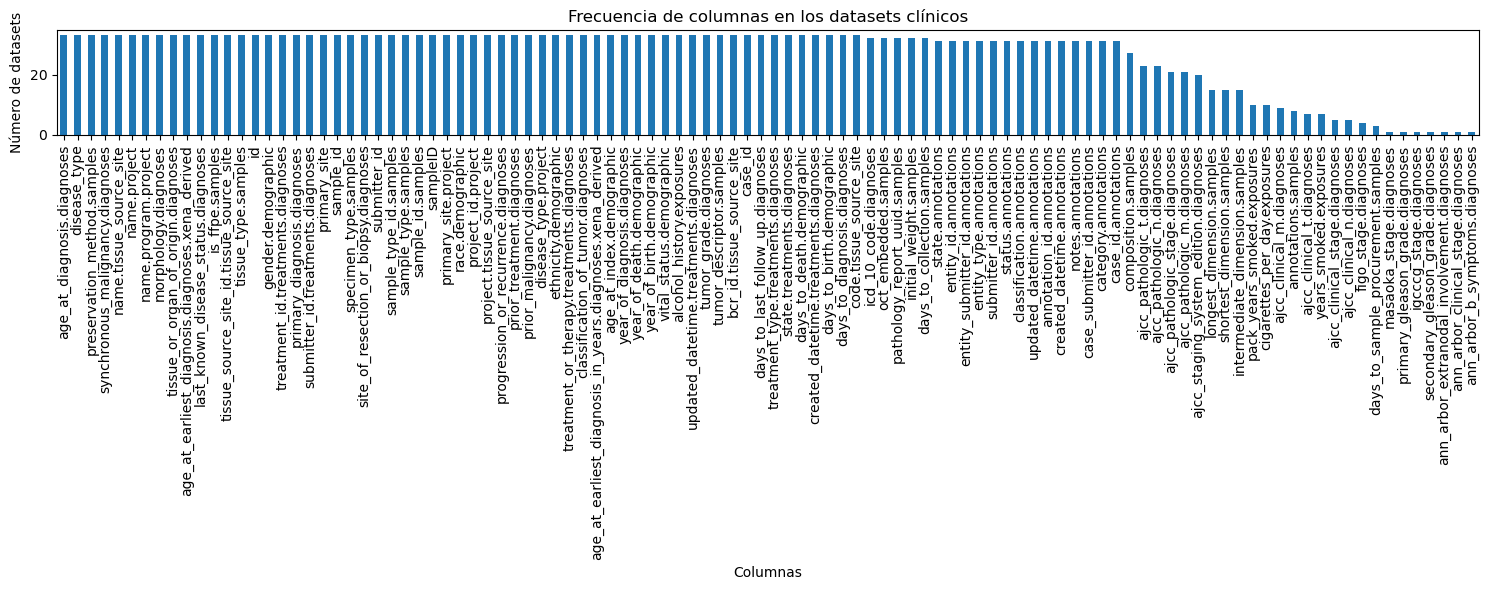

In [10]:
# Sumar las filas (cada columna se suma verticalmente → número de datasets donde está presente)
frecuencia_columnas = df.drop(columns=["Unnamed: 0"], errors="ignore").sum(axis=0).sort_values(ascending=False)

# Mostrar todas las columnas y su frecuencia
print("📊 Frecuencia de todas las columnas en los datasets:")

# Crear gráfico
plt.figure(figsize=(15, 6))
frecuencia_columnas.plot(kind='bar')

# Títulos y ejes
plt.title("Frecuencia de columnas en los datasets clínicos")
plt.xlabel("Columnas")
plt.ylabel("Número de datasets")
plt.xticks(rotation=90)

# Mostrar gráfico sin guardar
plt.tight_layout()
plt.show()

In [13]:
columnas_incompletas = frecuencia_columnas[frecuencia_columnas < 33].index.tolist()

print("❗ Columnas que NO están en los 33 datasets:")
print(columnas_incompletas)

❗ Columnas que NO están en los 33 datasets:
['icd_10_code.diagnoses', 'oct_embedded.samples', 'pathology_report_uuid.samples', 'initial_weight.samples', 'days_to_collection.samples', 'state.annotations', 'entity_id.annotations', 'entity_submitter_id.annotations', 'entity_type.annotations', 'submitter_id.annotations', 'status.annotations', 'classification.annotations', 'updated_datetime.annotations', 'annotation_id.annotations', 'created_datetime.annotations', 'notes.annotations', 'case_submitter_id.annotations', 'category.annotations', 'case_id.annotations', 'composition.samples', 'ajcc_pathologic_t.diagnoses', 'ajcc_pathologic_n.diagnoses', 'ajcc_pathologic_stage.diagnoses', 'ajcc_pathologic_m.diagnoses', 'ajcc_staging_system_edition.diagnoses', 'longest_dimension.samples', 'shortest_dimension.samples', 'intermediate_dimension.samples', 'pack_years_smoked.exposures', 'cigarettes_per_day.exposures', 'ajcc_clinical_m.diagnoses', 'annotations.samples', 'ajcc_clinical_t.diagnoses', 'years